In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
from copy import deepcopy
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
df = pd.read_pickle('pickle/df.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9092
Data columns (total 52 columns):
cow_code                          9093 non-null int64
state_name                        9093 non-null object
year                              9093 non-null int64
num_trade_states                  8867 non-null float64
export_dollars                    8588 non-null float64
import_dollars                    8575 non-null float64
military_expenditure              8338 non-null float64
military_personnel                8735 non-null float64
prim_energy_consumption           8823 non-null float64
total_pop                         8871 non-null float64
cinc_score                        8871 non-null float64
num_alliances                     9093 non-null float64
pre_1816_alliances                9093 non-null float64
num_in_effect_1231_2012           9093 non-null float64
defense_treaties                  9093 non-null float64
neutrality_treaties               9093 non-null float64
no

In [8]:
# impute for total non-religious
# do any other religion values not make sense as 0?
# use threshold for first non-zero
# maybe a relevant 0 is any 0 followed by a number greater than 10,000?

In [9]:
df = df.sort_values(by = ['year', 'cow_code'], ascending = True)

In [10]:
len(df.columns)

52

In [11]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_cum_duration', 'num_wars', 'ongoing_2010',
       'revision_pct', 'avg_hostility_level', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime', 'cabinet_assembly', 'popular_election',
      

In [12]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

1980
1995
1996
1997
2001
2007
2008


In [13]:
# df[df['year'] == 2008]['cow_code'].value_counts()[:10]

In [14]:
df.drop(3890, inplace = True)
df.drop(6610, inplace = True)
df.drop(6629, inplace = True)
df.drop(6913, inplace = True)
df.drop(7577, inplace = True)
df.drop(8751, inplace = True)
df.drop(8804, inplace = True)
df.drop(8854, inplace = True)
df.drop(8858, inplace = True)
df.drop(9057, inplace = True)
df.drop(9000, inplace = True)
df.drop(8931, inplace = True)
df.drop(8912, inplace = True)

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

In [15]:
# df.drop(3890, inplace = True)
# df.drop(6619, inplace = True)
# df.drop(6638, inplace = True)
# df.drop(6926, inplace = True)
# df.drop(7596, inplace = True)
# df.drop(8783, inplace = True)
# df.drop(8886, inplace = True)
# df.drop(8838, inplace = True)
# df.drop(8890, inplace = True)
# df.drop(9092, inplace = True)
# df.drop(8964, inplace = True)
# df.drop(8945, inplace = True)
# df.drop(9033, inplace = True)

# df = df.reset_index()
# df.drop(['index'], axis = 1, inplace = True)

In [16]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

In [17]:
df[df['mtco2'] <= 0]

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2
195,645,Iraq,1948,71.00,172500000.00,137330000.00,17574000.00,31000.00,420000000.00,4935000.00,0.00,13.00,0.00,4.00,1.00,0.00,9.00,13.00,1.00,0.44,1.00,0.00,1.00,5.00,Islam,Western Asia,Asia,Nonelective,No legislature exists,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Only members from regime party,Democratic incumbent,No,0,10,No,Yes,Yes,No,No,No,No,No,Royal dictatorship,No,No,17.00,0,-0.10
353,630,Iran,1950,74.00,183199999.50,548630000.80,76215000.00,114000.00,59112000000.00,16276000.00,0.01,3.00,0.00,0.00,0.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Southern Asia,Asia,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,10,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,81.00,0,-5.40
443,670,Saudi Arabia,1951,75.00,134599999.50,492949999.90,24130000.00,7000.00,21536000000.00,3271000.00,0.00,13.00,0.00,5.00,4.00,1.00,11.00,13.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Western Asia,Asia,Nonelective,No legislature exists,Closed,All parties legally banned,No parties,No parties outside regime,No legislature or all nonpartisan,Democratic incumbent,No,0,20,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,36.00,0,-0.35
525,670,Saudi Arabia,1952,76.00,180399999.80,651319999.50,19432000.00,8000.00,23476000000.00,3347000.00,0.00,15.00,0.00,7.00,6.00,1.00,13.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Western Asia,Asia,Nonelective,No legislature exists,Closed,All parties legally banned,No parties,No parties outside regime,No legislature or all nonpartisan,Democratic incumbent,No,0,21,No,Yes,No,No,Yes,No,No,No,Royal dictatorship,No,No,37.00,0,-0.17
2177,433,Senegal,1968,132.00,177599999.90,153980000.20,15009000.00,7000.00,1698000000.00,4195000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Western Africa,Africa,Direct election,Elective legislature,Elected,Multiple parties legally allowed,One party,One party outside regime,Only members from regime party,Democratic incumbent,No,0,9,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,9.00,0,-0.08
5630,565,Namibia,1990,164.00,209405689.50,537332252.00,47440000.00,10000.00,0.00,1352000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Southern Africa,Africa,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,1,1,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,1.00,0,0.00


In [18]:
df.loc[df['military_personnel'] == 0, 'military_personnel'] = None
df.loc[df['prim_energy_consumption'] == 0, 'prim_energy_consumption'] = None
df.loc[df['export_dollars'] < 1000, 'export_dollars'] = None
df.loc[df['import_dollars'] < 1000, 'import_dollars'] = None

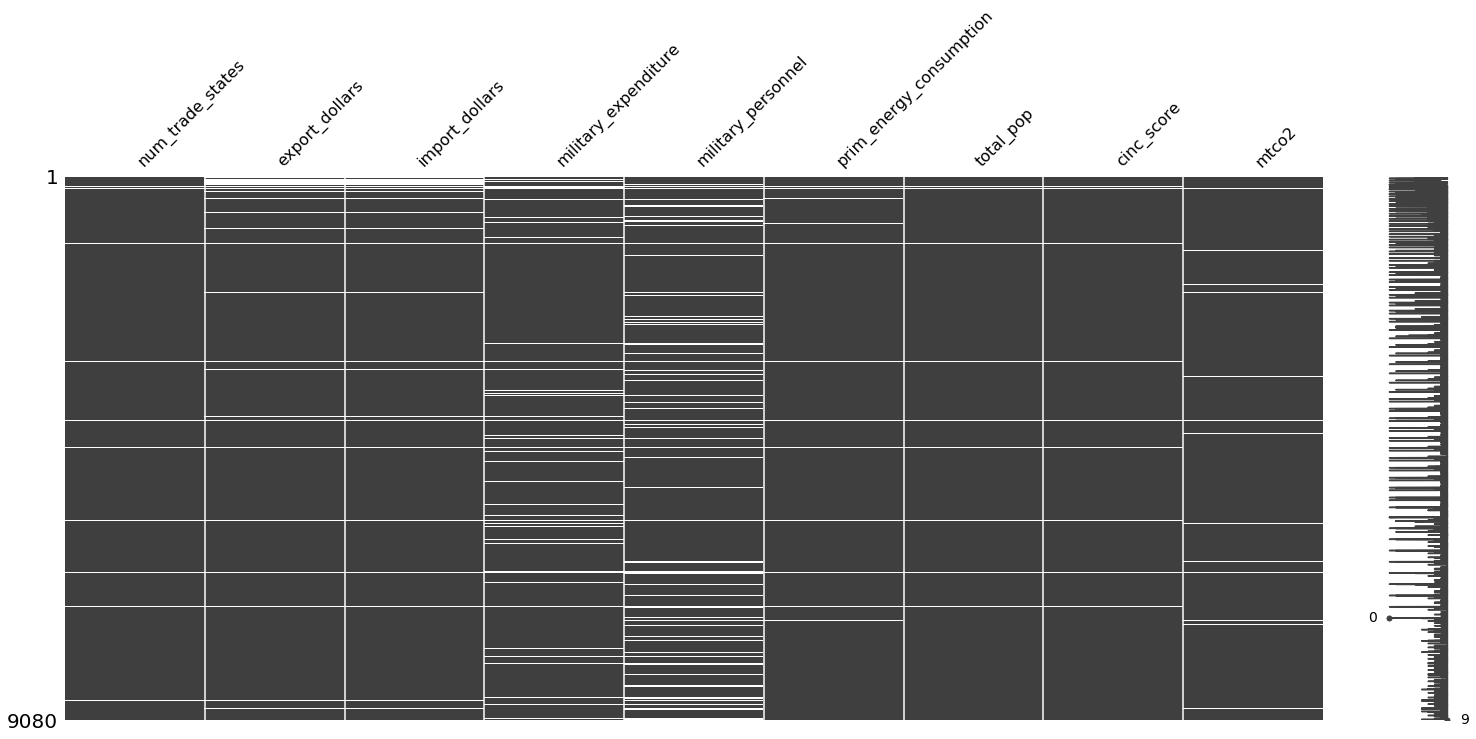

In [19]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
                     'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_cum_duration',
                     'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'majority_religion', 'un_continent', 'un_region', 'election_type',
                     'legislation_type', 'legislature_status', 'party_legal_status',
                     'party_existance', 'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership', 'num_leadership_changes',
                     'leader_tenure', 'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
                     'age_govt', 'num_transitions_ever'], axis = 1));

In [20]:
column_list = ['num_trade_states', 'prim_energy_consumption',
               'total_pop', 'cinc_score', 'military_personnel',
               'export_dollars', 'import_dollars',
               'military_expenditure', 'mtco2']
quad_list = ['export_dollars', 'import_dollars', 'military_expenditure']

In [21]:
for c_code in df['cow_code'].unique():
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') == len(data_list):
            df.loc[df['cow_code'] == c_code, column] = 0
        elif column not in quad_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate()
        elif column in quad_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate(method = 'quadratic')
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') <= len(data_list) - 1:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].bfill()
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].ffill()

In [22]:
len(df[df['mtco2'] <= 0])

193

In [23]:
df.loc[df['export_dollars'] <= 0, 'export_dollars'] = None
df.loc[df['import_dollars'] <= 0, 'import_dollars'] = None
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = None
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = None

In [24]:
for c_code in df['cow_code'].unique():
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') <= len(data_list) - 1:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].bfill()
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].ffill()

In [25]:
df.loc[df['export_dollars'] <= 0, 'export_dollars'] = 0
df.loc[df['import_dollars'] <= 0, 'import_dollars'] = 0
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = 0

In [26]:
print(len(df[df['export_dollars'].isnull()]))
print(len(df[df['import_dollars'].isnull()]))
print(len(df[df['military_expenditure'].isnull()]))

3
21
400


In [27]:
df = deepcopy(df[df['import_dollars'].isnull() == False])
df.loc[df['military_expenditure'].isnull(), 'military_expenditure'] = 0

In [28]:
print(len(df[df['export_dollars'].isnull()]))
print(len(df[df['import_dollars'].isnull()]))
print(len(df[df['military_expenditure'].isnull()]))

0
0
0


In [29]:
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'decade'] = '40s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'decade'] = '50s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'decade'] = '60s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980), 'decade'] = '70s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990), 'decade'] = '80s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000), 'decade'] = '90s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010), 'decade'] = '2000s'
df.loc[(df['num_wars'] != 0) & (df['num_wars'].isnull() == False), 'war_vs_peace'] = 'war'
df.loc[(df['num_wars'] == 0) | (df['num_wars'].isnull()), 'war_vs_peace'] = 'peace'
df.loc[(df['num_conflicts'] != 0) & (df['num_conflicts'].isnull() == False), 'conflict_vs_peace'] = 'conflict'
df.loc[(df['num_conflicts'] == 0) | (df['num_conflicts'].isnull()), 'conflict_vs_peace'] = 'peace'
df['export_import_ratio'] = df['export_dollars']/df['import_dollars']

In [30]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2,decade,war_vs_peace,conflict_vs_peace,export_import_ratio
0,2,United States of America,1946,65.00,160000000.00,11343750000.00,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,0.27,0.00,0.00,0.00,3.50,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,2,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0,2253.03,40s,peace,conflict,0.01
1,20,Canada,1946,65.00,2794800000.00,3297300000.00,1552759000.00,46000.00,119264000000.00,12292000.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Northern America,Americas,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,12,No,No,No,No,No,Yes,Yes,No,Parliamentary democracy,No,No,27.00,0,138.43,40s,peace,peace,0.85
2,40,Cuba,1946,65.00,559900000.00,683650000.00,39943000.00,18000.00,162000000.00,5040000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Caribbean,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,14,Yes,No,Yes,No,No,Yes,No,Yes,Presidential democracy,No,No,11.00,0,0.17,40s,peace,peace,0.82
3,41,Haiti,1946,65.00,28900000.00,30400000.00,1940000.00,5000.00,2000000.00,3140000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Caribbean,Americas,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Rules rewritten unconstitutionally,No,2,1,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,77.00,0,0.11,40s,peace,peace,0.95
4,42,Dominican Republic,1946,65.00,67100000.00,91420000.00,3856000.00,7000.00,10000000.00,2030000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Caribbean,Americas,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Only members from regime party,Democratic incumbent,No,0,5,Yes,No,No,No,No,No,No,No,Military dictatorship,No,No,17.00,0,0.01,40s,peace,peace,0.73


In [31]:
df = deepcopy(df.sort_values(by = ['cow_code', 'year'], ascending = True).reset_index())
df.drop(['index'], axis = 1, inplace = True)

In [32]:
for code in df['cow_code'].unique():
    df.loc[(df['cow_code'] == code) & (df['year'] == df[df['cow_code'] == code]['year'].min()), 'minimum_year'] = 'Yes'

In [33]:
df['previous_export_dollars'] = df['export_dollars'].shift(1)
df['previous_import_dollars'] = df['import_dollars'].shift(1)
df['previous_military_expenditure'] = df['military_expenditure'].shift(1)
df['previous_military_personnel'] = df['military_personnel'].shift(1)
df['previous_export_import_ratio'] = df['export_import_ratio'].shift(1)
df['previous_prim_energy_consumption'] = df['prim_energy_consumption'].shift(1)
df['previous_cinc_score'] = df['cinc_score'].shift(1)
df['previous_total_pop'] = df['total_pop'].shift(1)
df['previous_mtco2'] = df['mtco2'].shift(1)

In [34]:
len(df)

9059

In [35]:
df['previous_year'] = df['year'].shift(1)

In [36]:
len(df[(df['previous_year'] - df['year']) != 1])

9059

In [37]:
len(df[((df['year'] - df['previous_year']) != 1) & (df['minimum_year'] != 'Yes')])

0

In [38]:
len(df) - len(df['cow_code'].unique())

8866

In [39]:
df = deepcopy(df[df['minimum_year'] != 'Yes'].reset_index())
df.drop(['index'], axis = 1, inplace = True)

In [40]:
len(df)

8866

In [41]:
df['export_dollars_change'] = df['export_dollars'] - df['previous_export_dollars']
df['export_dollars_change_pct'] = df['export_dollars']/df['previous_export_dollars']
df['import_dollars_change'] = df['import_dollars'] - df['previous_import_dollars']
df['import_dollars_change_pct'] = df['import_dollars']/df['previous_import_dollars']
df['military_expenditure_change'] = df['military_expenditure'] - df['previous_military_expenditure']
df['military_expenditure_change_pct'] = df['military_expenditure']/df['previous_military_expenditure']
df['military_personnel_change'] = df['military_personnel'] - df['previous_military_personnel']
df['military_personnel_change_pct'] = df['military_personnel']/df['previous_military_personnel']
df['export_import_ratio_change'] = df['export_import_ratio'] - df['previous_export_import_ratio']
df['export_import_ratio_change_pct'] = df['export_import_ratio']/df['previous_export_import_ratio']
df['prim_energy_consumption_change'] = df['prim_energy_consumption'] - df['previous_prim_energy_consumption']
df['prim_energy_consumption_change_pct'] = df['prim_energy_consumption']/df['previous_prim_energy_consumption']
df['total_pop_change'] = df['total_pop'] - df['previous_total_pop']
df['total_pop_change_pct'] = df['total_pop']/df['previous_total_pop']
df['mtco2_change'] = df['mtco2'] - df['previous_mtco2']
df['mtco2_change_pct'] = df['mtco2']/df['previous_mtco2']
df['cinc_score_change'] = df['cinc_score'] - df['previous_cinc_score']

df.drop(['previous_export_dollars', 'previous_import_dollars',
         'previous_military_expenditure', 'previous_military_personnel',
         'previous_export_import_ratio', 'previous_cinc_score',
         'previous_total_pop', 'previous_prim_energy_consumption',
         'minimum_year', 'previous_year', 'previous_mtco2'], axis = 1, inplace = True)

In [42]:
# solving divide by 0 errors
df.loc[df['military_expenditure_change_pct'].isnull(), 'military_expenditure_change_pct'] = 0
df.loc[df['military_personnel_change_pct'].isnull(), 'military_personnel_change_pct'] = 0
df.loc[df['mtco2_change_pct'].isnull(), 'mtco2_change_pct'] = 0

In [43]:
for i, inf in enumerate(df[df['mtco2_change_pct'] == np.inf]['mtco2_change_pct']):
    if inf == np.inf:
        df.loc[df['mtco2_change_pct'] == np.inf, 'mtco2_change_pct'] = df[df['mtco2_change_pct'] == np.inf]['mtco2_change'].values[i]

In [44]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_cum_duration', 'num_wars', 'ongoing_2010',
       'revision_pct', 'avg_hostility_level', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime', 'cabinet_assembly', 'popular_election',
      

In [45]:
df = deepcopy(df.sort_values(by = ['year'], ascending = True).reset_index())
df.drop(['index'], axis = 1, inplace = True)

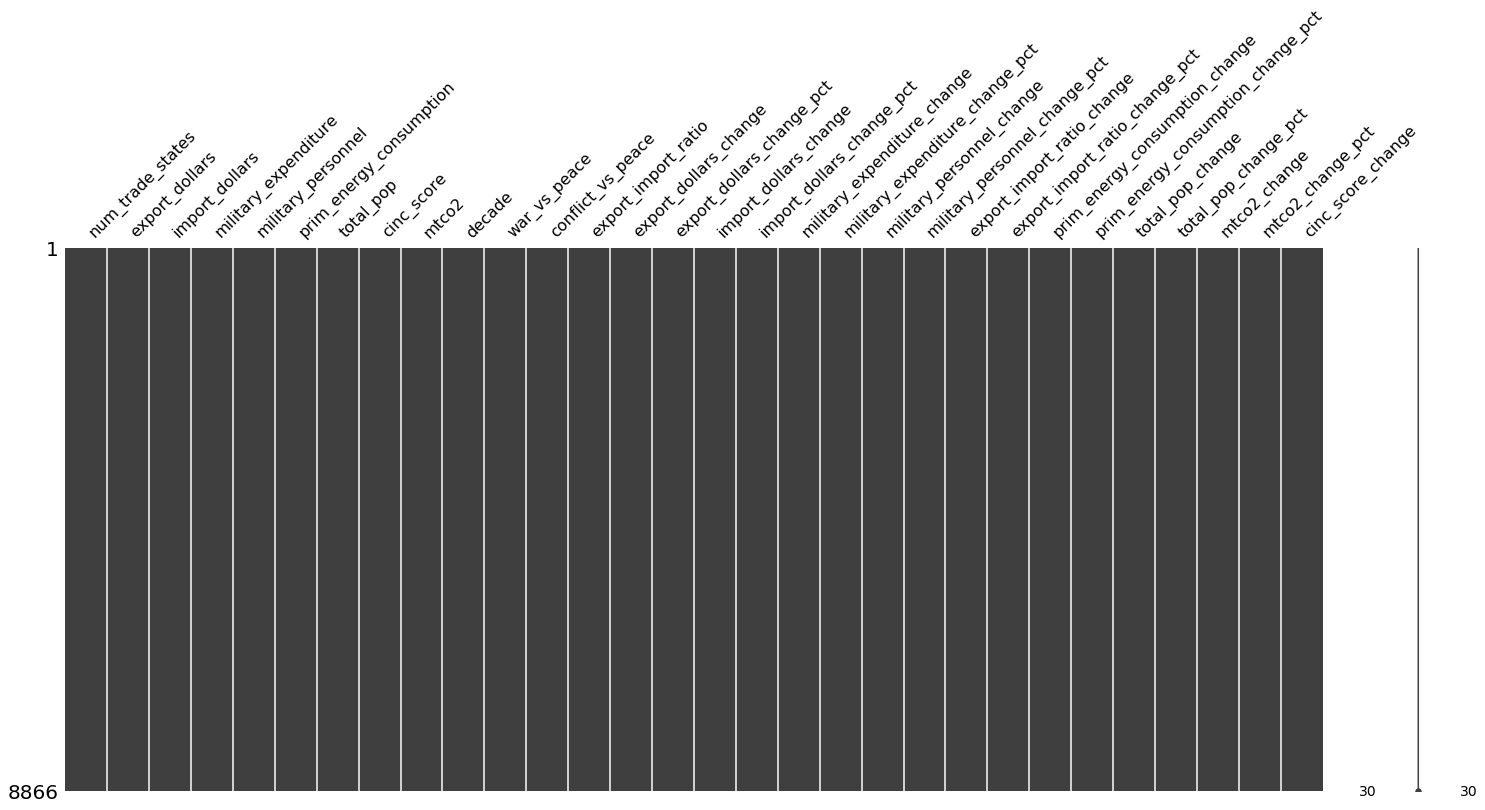

In [46]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
                     'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_cum_duration',
                     'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'majority_religion', 'un_continent', 'un_region', 'election_type',
                     'legislation_type', 'legislature_status', 'party_legal_status',
                     'party_existance', 'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership', 'num_leadership_changes',
                     'leader_tenure', 'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
                     'age_govt', 'num_transitions_ever'], axis = 1));

In [47]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2,decade,war_vs_peace,conflict_vs_peace,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change
0,2,United States of America,1947,67.00,76000000.00,11343750000.00,14315999000.00,1583000.00,2631554000000.00,144126000.00,0.31,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,3,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,78.00,0,2480.77,40s,peace,peace,0.01,-84000000.00,0.47,0.00,1.00,-30817985000.00,0.32,-1447000.00,0.52,-0.01,0.47,255266000000.00,1.11,2737000.00,1.02,227.74,1.10,-0.05
1,390,Denmark,1947,67.00,616200000.00,484590000.00,59412000.00,14000.00,17814000000.00,4150000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Northern Europe,Europe,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,1,1,No,No,No,No,No,Yes,Yes,No,Parliamentary democracy,No,No,47.00,0,21.46,40s,peace,peace,1.27,0.00,1.00,0.00,1.00,7023000.00,1.13,0.00,1.00,0.00,1.00,3422000000.00,1.24,50000.00,1.01,3.81,1.22,0.00
2,94,Costa Rica,1947,67.00,39700000.00,35990000.00,1411000.00,1000.00,38000000.00,730000.00,0.00,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Central America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,4,No,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,29.00,1,0.29,40s,peace,peace,1.10,0.00,1.00,0.00,1.00,237000.00,1.20,0.00,1.00,0.00,1.00,2000000.00,1.06,20000.00,1.03,0.00,1.00,-0.00
3,395,Iceland,1947,67.00,67200000.00,42760000.00,7593960.69,0.00,28000000.00,134000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Northern Europe,Europe,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,1,1,No,No,No,No,No,Yes,Yes,Yes,Mixed (semi‐presidential) democracy,No,No,4.00,0,0.00,40s,peace,peace,1.57,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,4000000.00,1.17,2000.00,1.02,-0.01,0.34,-0.00
4,93,Nicaragua,1947,67.00,25080000.00,17820000.00,7037000.00,3000.00,18000000.00,977000.00,0.00,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Central America,Americas,Nonelective,Elective legislature,Elected,Multiple p

In [48]:
df.to_pickle('pickle/df_imputed.pkl')
df.to_csv('dataframe_exports/df_imputed.csv')

In [49]:
df = pd.read_pickle('pickle/df_imputed.pkl')